# 반도체 박막 두께 분석 EDA
---

### 1. 배경
* 반도체 박막을 수십~수백 층쌓아올리는 공정에서는 박막의 결함으로 인한 두께와 균일도가 저하되는 문제 존재 
    * 이는 **소자 구조의 변형을 야기 + 성능 하락의 주요 원인**
        * 반도체: 물질을 칭하는 용어
        * 반도체 소자: 반도체 물질로 만든 전자부품(전기를 이용하는 부품)으로 물체를 지칭하는 용어  
    * 이를 사전에 방지하기 위해서는 **박막의 두께를 빠르면서도 정확히 측정**하는 것이 중요
       
    
* 반도체 박막은 얇은 반도체 막으로 박막의 종류와 두께는 반도체 소자의 특성을 결정짓는 중요한 요소 중 하나
   
   
* 박막의 두께를 측정하는 방법: 반사율 측정
    * 반사율: 입사광 세기에 대한 반사광 세기의 비율(반사광/입사광)
    * 반사율은 빛의 파장에 따라 변하며 파장에 따른 반사율의 분포를 반사율 스펙트럼


### 2. 구조 설명
* layer_1: 질화규소, layer_2: 이산화규소, layer_3: 질화규소, layer_4: 이산화 규소, 규소 기판 총 5층 구조
   
   
* **대회 목적: 파장에 따른 반사율을 통해 layer_1~layer_4의 두께 예측**

### 3. 데이터 설명
* 4층 박막의 두께(layer_1~layer_4)와 파장에 따른 반사율 스펙트럼(빛의 파장에 해당하는 반사율)

   

* 0~255 컬럼명은 파장을 뜻하며 비식별화 처리 

### 4. 대회 설명
* 평가지표: MAE(Mean Absolute Error)
    * 정답값과 예측값의 절대값 차이를 측정하는 지표
       
       
* 외부데이터 사용 불가 

### 5. EDA

### library import  & load data

In [13]:
import pandas as pd
import warnings
import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [1]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print(train.columns)
print(test.columns)

Index(['layer_1', 'layer_2', 'layer_3', 'layer_4', '0', '1', '2', '3', '4',
       '5',
       ...
       '216', '217', '218', '219', '220', '221', '222', '223', '224', '225'],
      dtype='object', length=230)
Index(['id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '216', '217', '218', '219', '220', '221', '222', '223', '224', '225'],
      dtype='object', length=227)


In [2]:
train.head()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,...,216,217,218,219,220,221,222,223,224,225
0,10,10,10,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,...,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,10,10,10,20,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,...,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,10,10,10,30,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,...,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,10,10,10,40,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,...,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,10,10,10,50,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,...,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781


In [3]:
test.head()

,id,0,1,2,3,4,5,6,7,8,...,216,217,218,219,220,221,222,223,224,225
0,0,0.535410,0.520775,0.494087,0.465134,0.430339,0.401751,0.355986,0.326427,0.282340,...,0.748339,0.757575,0.768130,0.777062,0.769173,0.768253,0.738704,0.739460,0.702139,0.702238
1,1,0.351099,0.398179,0.413809,0.418529,0.433257,0.455410,0.451065,0.464230,0.476011,...,0.333931,0.276307,0.211513,0.159223,0.110982,0.083130,0.099780,0.145420,0.260501,0.343857
2,2,0.490537,0.435958,0.413428,0.355796,0.335777,0.299944,0.242745,0.210555,0.180739,...,0.709371,0.746826,0.781436,0.788292,0.828630,0.835166,0.845859,0.846032,0.836724,0.846779
3,3,0.051634,0.075802,0.133983,0.154546,0.209387,0.251700,0.287552,0.333000,0.340617,...,0.075046,0.056651,0.079884,0.147469,0.213112,0.298096,0.382823,0.489381,0.562383,0.599247
4,4,0.154031,0.201728,0.270414,0.283799,0.343050,0.340233,0.379244,0.378511,0.373017,...,0.255070,0.242396,0.271287,0.328828,0.397950,0.486436,0.530573,0.582752,0.637296,0.637238


In [4]:
print(train.shape)
print(test.shape)

(810000, 230)
(10000, 227)


train 데이터는 810000개의 레코드와 230개의 컬럼으로 이루어져있음   
test 데이터는 10000개의 레코드와 227개의 컬럼으로 이루어져 있음.  

이때, test 데이터에는 id 값을 제외하고 사용해야함. 

---

### target 값의 범위 파악

In [5]:
print(train['layer_1'].value_counts())
print('-----------------------------')
print(train['layer_2'].value_counts())
print('-----------------------------')
print(train['layer_3'].value_counts())
print('-----------------------------')
print(train['layer_4'].value_counts())
print('-----------------------------')

300    27000
290    27000
20     27000
30     27000
40     27000
50     27000
60     27000
70     27000
80     27000
90     27000
100    27000
110    27000
120    27000
130    27000
140    27000
150    27000
160    27000
170    27000
180    27000
190    27000
200    27000
210    27000
220    27000
230    27000
240    27000
250    27000
260    27000
270    27000
280    27000
10     27000
Name: layer_1, dtype: int64
-----------------------------
300    27000
290    27000
20     27000
30     27000
40     27000
50     27000
60     27000
70     27000
80     27000
90     27000
100    27000
110    27000
120    27000
130    27000
140    27000
150    27000
160    27000
170    27000
180    27000
190    27000
200    27000
210    27000
220    27000
230    27000
240    27000
250    27000
260    27000
270    27000
280    27000
10     27000
Name: layer_2, dtype: int64
-----------------------------
300    27000
290    27000
20     27000
30     27000
40     27000
50     27000
60     27000
70     27000


10-300까지 10단위로 30개의 값들이 layer_1~layer_4 모두 27000개씩 동일하게 있음.  
target의 class 수가 30개로 꽤 많다고 생각이 들고 대회의 평가지표가 mae 이기 때문에 회귀로 접근 

---

### 각 파장별 요약값 확인

In [6]:
pd.set_option('display.max_columns', 230)

train.describe()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225
count,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810

범위가 서로 다른 값들을 신경망에 입력하면 신경망이 불균일한 데이터에 자동으로 적응할 수는 있지만 학습이 더 어려워질 수 있어 특징별로  정규화하는 것이 좋음. 해당 데이터의 범위는 0-1사이이므로 정규화 적용 유무 비교 

**정규화할 때 주의사항**   
TRAIN 데이터를 사용하여 TEST 데이터 정규화에 필요한 값의 범위를 결정함

---

### 결측치 확인

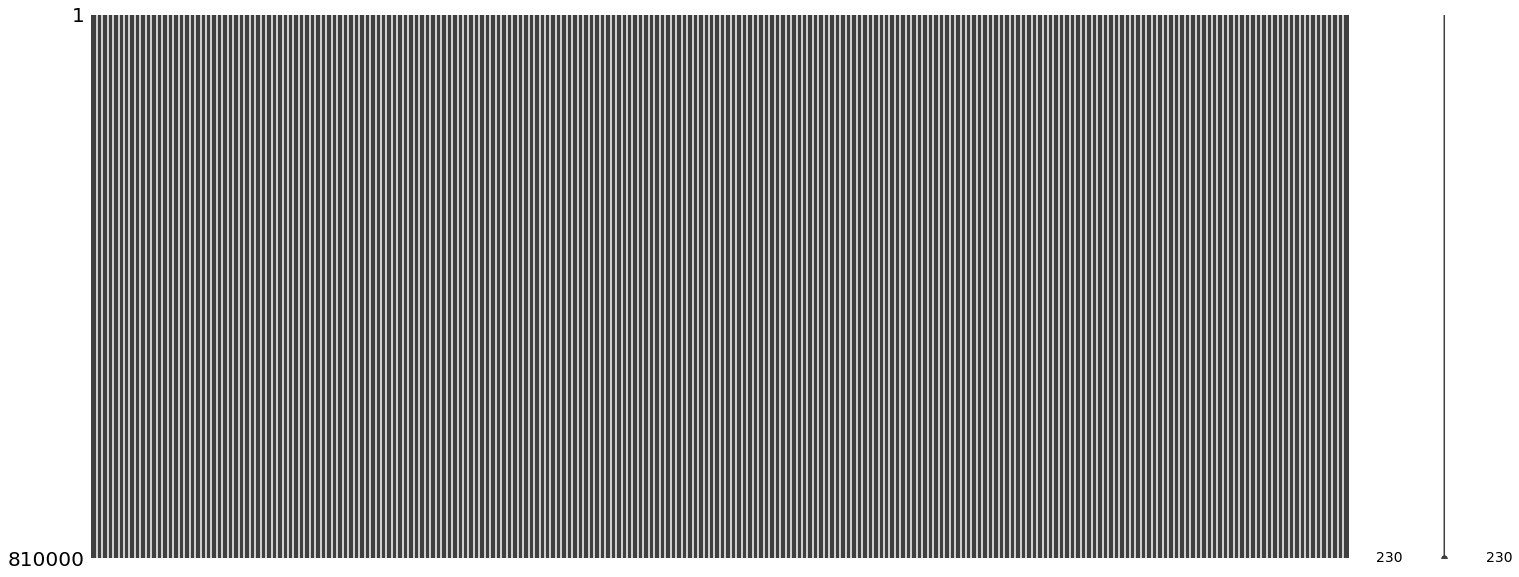

In [7]:
msno.matrix(train)

In [8]:
train.isnull().sum()[train.isnull().sum().values > 0]

Series([], dtype: int64)

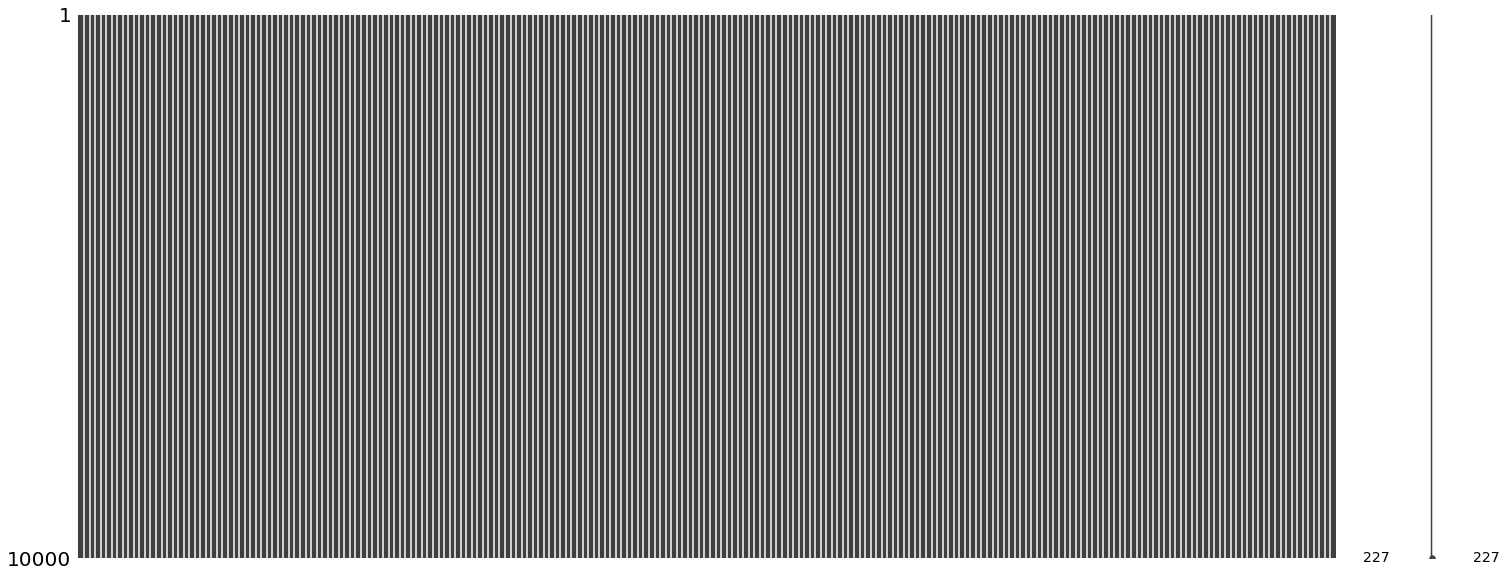

In [9]:
msno.matrix(test)

In [10]:
test.isnull().sum()[test.isnull().sum().values > 0]

Series([], dtype: int64)

결측치 없음. 

---

---

### 박막의 두께 별 빛의 파장에 따른 반사율 평균 비교

Text(0.5, 1, 'layer_4 heatmap')

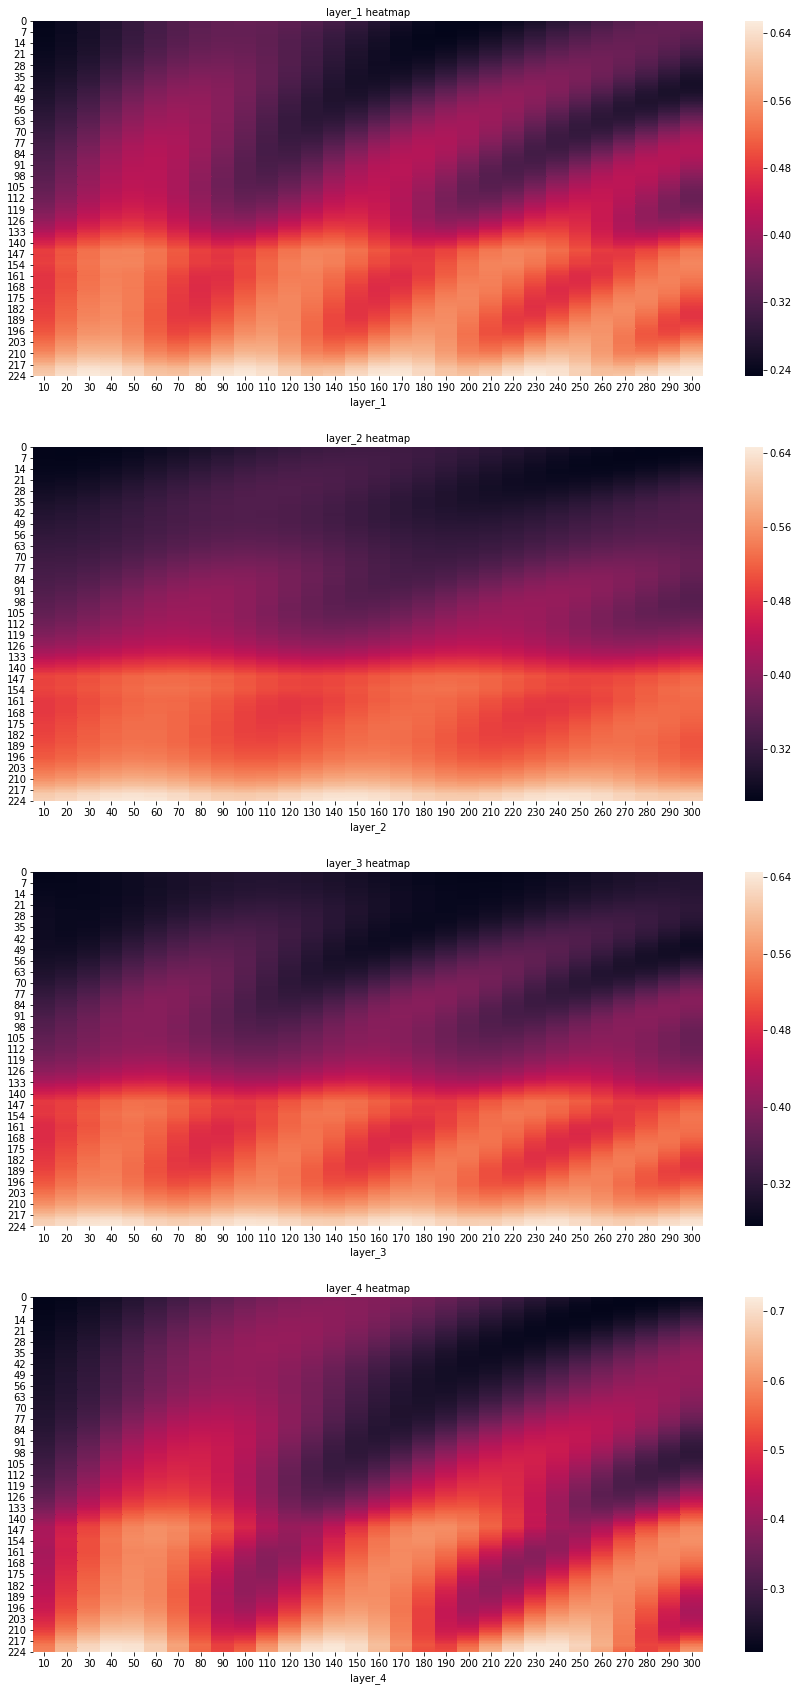

In [14]:
figure, ((ax1, ax2, ax3, ax4)) = plt.subplots(nrows = 4,ncols = 1)
figure.set_size_inches(15,30)

train_layer1 = train.drop(['layer_2','layer_3','layer_4'],axis=1).groupby(['layer_1']).mean()
train_layer2 = train.drop(['layer_1','layer_3','layer_4'],axis=1).groupby(['layer_2']).mean()
train_layer3 = train.drop(['layer_1','layer_2','layer_4'],axis=1).groupby(['layer_3']).mean()
train_layer4 = train.drop(['layer_1','layer_2','layer_3'],axis=1).groupby(['layer_4']).mean()

sns.heatmap(train_layer1.T,ax = ax1)
ax1.set_title('layer_1 heatmap',fontsize = 10)

sns.heatmap(train_layer2.T,ax = ax2)
ax2.set_title('layer_2 heatmap',fontsize = 10)

sns.heatmap(train_layer3.T,ax = ax3)
ax3.set_title('layer_3 heatmap',fontsize = 10)

sns.heatmap(train_layer4.T,ax = ax4)
ax4.set_title('layer_4 heatmap',fontsize = 10)

layer의 두께에 따라 증가하거나 감소하는 특정 패턴이 있다고 보이지는 않음. 

참고 토론: https://dacon.io/competitions/official/235554/talkboard/400061

# dacon baseline

### 딥러닝 이용

1. 머신러닝?
    - 데이터와 해답, 알고리즘의 성능 측정 방법을 알려주면 규칙을 찾아냄.
    - 가능성 있는 공간(가설 공간)을 사전에 정의하고 피드백 신호의 도움을 받아 입력 데이터에 대한 유용한 변환을 찾아내는 것
    - 머신러닝과 딥러닝의 핵심문제: 의미있는 데이터로의 변환   
![의미있는 데이터로 변환](https://user-images.githubusercontent.com/33725048/85216400-20e18f00-b3bf-11ea-8e89-db8da52d6259.PNG)
    -> 입력 데이터를 기반으로 기대 출력에 가깝게 만드는 유용한 표현

[출처](https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%94%A5%EB%9F%AC%EB%8B%9D/1-%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%B4%EB%9E%80-%EB%AC%B4%EC%97%87%EC%9D%B8%EA%B0%80/)

2. 머신러닝과 딥러닝의 차이점
    - 딥러닝은 머신러닝의 부분집합으로 머신러닝은 feature selection, feature engineering과 같은 특징 공학을 필요로 하지만 딥러닝은 데이터를 기반으로 스스로 학습하여 의미있는 데이터로 변환

3. 딥러닝 특징
    - 딥러닝의 딥은 연속된 층으로 표현을 학습한다는 개념으로 층 기반 표현 학습 또는 계층적 표현 학습이라고도 함.
    - feed-forward 방식
    - 1개 이상의 hidden layer를 가짐
    - fully-connected
    - bi-partite graph
    - hidden layer들을 여러 개 쌓아서 상위 패턴을 인지 
    - 딥러닝의 목표: weight의 정확한 값을 찾는 것
    - 작동방법
        - 입력값들의 weighted sum과 bias에 대하여 활성화함수를 실행하여 비선형 패턴을 인지 (이때, activation 함수는 미분가능해야함)
        - 처음부터 weight값을 정확하게 알아낼 수 없기 때문에 무작위 초기화를 거친 후 손실 점수가 낮아지는 방향으로 가중치를 조절해나가며 반복적으로 학습. 
        - 손실 함수에서 나온 값을 피드백 신호로 사용하여 손실 점수를 낮추는 방향으로 가중치를 조금씩 조절해 나가는 방법. 이때 조절은 역전파 알고리즘을 구현하는 최적화기(optimizer)의 역할

cf) 케라스 창시자의 딥러닝 with R 도서 참고 그림
![1](https://user-images.githubusercontent.com/33725048/85262352-9d9c6800-b4a8-11ea-9e90-b89a1e58946b.png)
       




In [1]:
#데이터를 불러옵니다.
import pandas as pd
import warnings

warnings.filterwarnings('ignore') # warning message 안나오도록함.

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [2]:
#독립변수와 종속변수를 분리합니다.
train_X = train.iloc[:,4:]
train_Y = train.iloc[:,0:4]
test_X = test.iloc[:,1:]

### DNN으로 접근 

* DNN(심층신경망)
    * 정의: 모델의 은닉층을 많이 늘리면서 학습의 결과를 향상시키는 방법으로 은닉층을 2개 이상 갖고 있는 학습 방법
    * 특징: 컴퓨터 스스로 학습을 반복하여 최적의 weight를 도출해내어 결과를 도출

In [3]:
#케라스를 통해 모델 생성을 시작합니다.
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()  # model 초기화 
model.add(Dense(units=160, activation='relu', input_dim=226))  # 첫번째 은닉층  # 226개 feature, 160개 뉴런, relu 함수를 활성화 함수로 사용
model.add(Dense(units=160, activation='relu'))   # 두번째 은닉층  
model.add(Dense(units=160, activation='relu'))   # 세번째 은닉층
model.add(Dense(units=4, activation='linear'))   # 출력층 (4개의 output을 도출해내야되기 때문에 units = 4)

Using TensorFlow backend.


#### activation function(활성화 함수) [출처](https://cs231n.github.io/neural-networks-1)
- 입력 신호의 총합을 신호로 변환하는 함수로 입력 받은 신호를 얼마나 출력할지(전달할 신호의 세기)를 결정하고 network 에 층을 쌓아 비선형성을 표현할 수 있도록 해줌.(선형합을 비선형 패턴도 풀어낼 수 있는 비선형 함수로 변환해주는 함수)
- 이때 아무 함수나 다 되는 것이 아닌 최적화를 위한 미분가능한 함수여야함. 
- sigmod
    - 0~1사이의 값을 가지는 S형 함수
    - 단점: 뉴런의 활성화 값이 0 또는 1에 가깝다면 해당 편미분 값이 0에 매우 가까워지는 특성이 존재하고 0에 매우 작은 값이 계속 곱해지만 그 값은 0으로 점점 더 수렵해서 학습의 결과가 back propagation 과정에서 전달되지 못하고 weight 값이 조정되지 않는 vanishing gradient 현상 발생 
- tanh fuction
    - -1~1사이의 범위를 가지는 비선형 함수로  중심값이 0이기 때문에 sigmoid 보다 최적화가 빠르지만 vanishing gradient 문제 발생
-  Relu
    - 0부터 무한대까지의 범위를 가진 선형 함수로 vanishing gradient 현상을 해결하기 위해 나온 함수로 underfitting을 막을 수 있음. 
    - sigmoid와 tanh에 비해 수렴되는 속도가 빠름 
    - 상대적으로 연산량이 많은 지수함수를 사용하지 않아 컴퓨터의 연산에 대한 부담을 줄여줌, 
    - lr 을 조절하여 dying Relu problem을 해결해야함.
        - dying Relu problem: 학습 과정에서 weight가 특정 뉴런에서 활성화되지 않도록 바뀌면 해당 뉴런을 지나는 gradient도 0이 되는 문제 

In [4]:
#모델을 컴파일합니다.
# adam: momentum과 gradient 히스토리를 모두 고려하는 방식 
# adam 이 optimum을 지나쳤다가 다시 돌아오는 경우는 의도된 특성으로 velocity로 인한 문제.
# sharp minima는 지나치고 local minima or saddle point에 갇히지 않음. 
# sharp minima:loss fuction의 굴곡이 커서 학습과 테스트 시 조금만 어긋나도 성능이 급격하게 변하는 지점
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

#### compile 단계에서는 loss function, optimizer,metics을 정의해주어야함.
* loss function(손실함수): 학습에 사용되는 피드백 신호를 정의
    * 예측값이 실제값과 얼마나 다른지를 측정 
* optimizer(최적화기): 학습이 어떻게 진행되는지 결정 
    * 손실 값을 이용하여 계층의 weight 계산

#### optimizer 종류

목표: loss function 의 최솟값 구하기
    
![optimizer](https://user-images.githubusercontent.com/33725048/85216965-0a8b0180-b3c6-11ea-93ba-34ec273f109d.PNG)

[출처](https://www.slideshare.net/yongho/ss-79607172)

- Gradient Descent: loss function의 현 가중치에서 기울기(gradient)를 구하여 loss를 줄이는 방향으로 값을 update
    - 단점: 최적의 값을 찾아내기 위해 한 칸 전진할 때마다 모든 데이터 셋(Batch)을 input값으로 사용해줘야하기 때문에 학습 속도가 오래걸림.
- Stochastic Gradient Descent: Gradient Descent의 단점을 해결하기 위해 일부 데이터 모음(mini-batch)를 사용하여 loss function 계산
    - 장점1: 계산 속도가 훨씬 빠르기 때문에 같은 시간에 더 많은 step을 갈 수 있고 여러 번 반복할 경우 batch 처리한 결과로 수렴
    - 장점2: Gradeint Descent는 local minimum에 빠져 global minimum을 찾기 힘들어질 수 있지만 이 방법은 그렇지 않고 더 좋은 방향으로 수렴할 가능성 존재.            
            
[출처](https://ko.wikipedia.org/wiki/%EA%B7%B9%EA%B0%92)
![local minimum](https://user-images.githubusercontent.com/33725048/85252628-31653880-b497-11ea-881b-bb78c264f985.PNG)

[optimizer 종류 및 설명 참고](https://hyunw.kim/blog/2017/11/01/Optimization.html)

신경망을 학습하는 데 사용되는 피드백 신호는 계층 수가 증가함에 따라 사라지기 때문에 깊이 있게 쌓인 계층들을 거치면서 기울기 전파를 하는게 핵심 쟁점

In [5]:
#모델을 학습합니다.
model.fit(train_X, train_Y, epochs=20, batch_size=10000, validation_split = 0.05)


Train on 769500 samples, validate on 40500 samples
Epoch 1/20
769500/769500 [==============================] - 13s 17us/step - loss: 95.1063 - mae: 95.1063 - val_loss: 95.1326 - val_mae: 95.1326
Epoch 2/20
769500/769500 [==============================] - 13s 17us/step - loss: 74.8003 - mae: 74.8003 - val_loss: 94.1281 - val_mae: 94.1281
Epoch 3/20
769500/769500 [==============================] - 9s 12us/step - loss: 74.3217 - mae: 74.3217 - val_loss: 93.5507 - val_mae: 93.5507
Epoch 4/20
769500/769500 [==============================] - 9s 12us/step - loss: 73.3177 - mae: 73.3177 - val_loss: 93.0253 - val_mae: 93.0253
Epoch 5/20
769500/769500 [==============================] - 9s 12us/step - loss: 71.2277 - mae: 71.2277 - val_loss: 91.7317 - val_mae: 91.7317
Epoch 6/20
769500/769500 [==============================] - 9s 12us/step - loss: 67.4461 - mae: 67.4461 - val_loss: 91.0603 - val_mae: 91.0602
Epoch 7/20
769500/769500 [==============================] - 9s 12us/step - loss: 64.5230

batch size가 큰 경우 기울기를 계산하기 위해 더 많은 데이터를 사용하게 되므로 최적화시켜야하는 전체 데이터를 사용한 해공간의 기울기 값과 유사한 기울기를 사용하므로 최적화가 더 수월해질 수 있지만 실제 최적화 시켜야할 문제 공간이 평평한 경우에는 실제와 유사하게 근사된 기울기의 절대값이 작아 수렴 속도가 매우 느려질 수 있음. 극단적인 경우에는 local minima or saddle point에 빠져서 loss가 줄어들지 않을 수도 있음. 

반면 batch size가 작은 경우 상대적으로 부정확한 기울기를 사용한다는 단점이 있지만 한 번의 업데이터에 적은 계산 비용이 들어가 한 번 업데이트 할 동안 여러번의 업데이트를 수행할 수 있고 기울기의 부정확한 면이 랜덤성으로 작용해 실제 기울기가 낮은 구간이나 local minima or saddle point에서 쉽게 벗어날 가능성이 있음.

In [6]:
#예측값을 생성합니다.
pred_test = model.predict(test_X)

In [7]:
#submission 파일을 생성합니다.
sample_sub = pd.read_csv('data/sample_submission.csv', index_col=0)
submission = sample_sub+pred_test
submission.to_csv('submission.csv')